# Loading Dataset

You can download the dataset from {https://challenge.isic-archive.com/data/#2018}.
The data from **Task 3** will be used in this assignment. You should download all Training, Validation, Test Data and their corresponding ground truth labels. The dataset consists of 10015 skin images from 7 classes. We will extract the images of 7 classes (Melanoma, Melanocytic nevi, Basal cell carcinoma, Actinic keratoses and intraepithelial carcinoma (akaic), Benign keratosis-like lesions, Dermatofibroma\ and Vascular lesions) and save them as .npy file with the following code:


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Tilburg/Masters CSAI/Year 1 - Semester 1/Deep Learning/Project')

In [ ]:

# Replace these paths with the actual paths to your dataset folders
data_folder = "/content/drive/MyDrive/Tilburg/Masters CSAI/Year 1 - Semester 1/Deep Learning/Project/ISIC2018_Task3_Training_Input"
ground_truth_folder = "/content/drive/MyDrive/Tilburg/Masters CSAI/Year 1 - Semester 1/Deep Learning/Project/ISIC2018_Task3_Training_GroundTruth"

files = os.listdir(data_folder)
#print(len(files))
csv_file_path = os.path.join(ground_truth_folder, "ISIC2018_Task3_Training_GroundTruth.csv")
#print(csv_file_path)
df = pd.read_csv(csv_file_path)

image_data = []
labels = []

for index, row in df.iterrows():
    image_title = row['image']
    #print(image_title in files)
    if image_title+'.jpg' in files:
      label = row.drop('image', axis=0)  # Drop the 'image' column to keep only labels

      image_path = os.path.join(data_folder, image_title + ".jpg")

      try:
          # Open the image using PIL (or you can use OpenCV) within a 'with' statement
          with Image.open(image_path) as image:
              if image is not None:
                  # Resize images
                  im = image.resize((120,150), Image.LANCZOS)
                  # Append image and label to respective lists
                  image_data.append(np.array(im))
                  labels.append(label)
              else:
                  print(f"Error opening image '{image_path}': NoneType object returned")
      except Exception as e:
          print(f"Error opening image '{image_path}': {e}")

tr_labels = np.array(labels)
image_matrix = np.array([np.array(img) for img in image_data])

np.save("data.npy",image_matrix)
np.save("labels.npy",tr_labels)

# Class mapping
class_mapping = {
    tuple([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanoma",
    tuple([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanocytic nevi",
    tuple([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]): "Basal cell carcinoma",
    tuple([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]): "Acaic",
    tuple([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]): "Benign keratosis-like lesions",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]): "Dermatofibroma",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]): "Vascular lesions"
}

# # Convert float labels to class names
# class_labels = [class_mapping[tuple(label)] for label in tr_labels]
# np.save("labels_name.npy",class_labels)




Once you save your data, you can load it from your directory.

In [ ]:
ls

augmented_data/                           load.py
augmented.keras                           my_history.npy
augmented_X.npy                           no_fine_tune_transfer_history.npy
augmented_y.npy                           no_fine_tune_transfer.keras
baseline.h5                               plots_for_report/
baseline.keras                            Practical01_MLP_solution.ipynb
data.npy                                  transfer_history.npy
DeepLearningAssignment_Block1_2023.pdf    transfer.keras
DL_Assignment_baseline.ipynb              transfer_weights.h5
fine_tuned_aug_data_transfer_history.npy  X_test.npy
fine_tuned_aug_data_transfer.keras        X_train_combined.npy
history_augmented.npy                     X_train.npy
history_transfer.npy                      X_val.npy
ISIC2018_Task3_Training_GroundTruth/      y_test.npy
ISIC2018_Task3_Training_Input/            y_train_combined.npy
labels_name.npy                           y_train.npy
labels.npy                              

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#file_dir = "/content/drive/MyDrive/Deep_Learning_Fall23/Assignment/"
#data = np.load("data.npy")
labels = np.load("labels.npy", allow_pickle=True)
class_labels = np.load("labels_name.npy")

In [ ]:
# (number of images,  height ,  width , number of channels (red, green blue))
print(data.shape)
# (number of images, number of labels)
print(labels.shape)
# number of total labels
print(class_labels.shape)
# example 1 hot encoded label
print(labels[0])
# example label name
print(class_labels[0])
#define classes

(10015, 150, 120, 3)
(10015, 7)
(10015,)
[0.0 1.0 0.0 0.0 0.0 0.0 0.0]
Melanocytic nevi


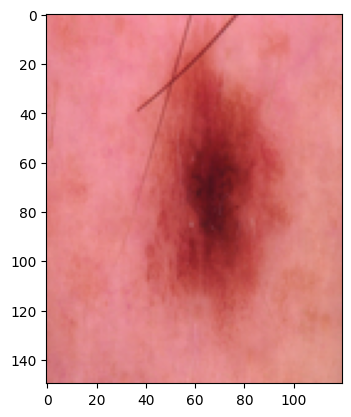

In [ ]:
# take a look at the first photo
plt.imshow(data[0])

## Preprocessing

In [ ]:
# stratitfied train test split
# Stratified train/test/validation split ensures that the distribution of classes
# (labels) in the training and test sets is similar to the distribution in the original dataset.
from sklearn.model_selection import train_test_split
X_train, X_test_temp, y_train, y_test_temp = train_test_split(data,
                                                              labels,
                                                              test_size=0.4,
                                                              stratify=labels,
                                                              random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp,
                                                y_test_temp,
                                                test_size = 0.5,
                                                random_state =42,
                                                stratify = y_test_temp)

In [ ]:
# normalize the data betwee 0-1
# The image is a 3-d matrix (height x width x number of channels) where the values are between 0-255
# dividing by 255 makes so that that the maximum is 1 (i.e 255/255 = 1) and the minimum is 0 (i.e 0 / 255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

# convert labels to floats
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
y_val = y_val.astype('float32')





In [ ]:
# clear some space
import gc
del data
gc.collect()

53

In [ ]:
# #save for later
# np.save("X_val.npy", X_val, allow_pickle = True)
# np.save("y_val.npy", y_val, allow_pickle = True)
# np.save("X_test.npy", X_test, allow_pickle = True)
# np.save("y_test.npy", y_test, allow_pickle = True)
# np.save("X_train.npy", X_train, allow_pickle = True)
# np.save("y_train.npy", y_train, allow_pickle = True)

# Visualizing Sample images

In [ ]:
from random import sample
sample_indices = sample(range(X_train.shape[0]),15)
sample_images = X_train[sample_indices]
sample_labels = y_train[sample_indices]

In [ ]:
sample_images.shape

(15, 150, 120, 3)

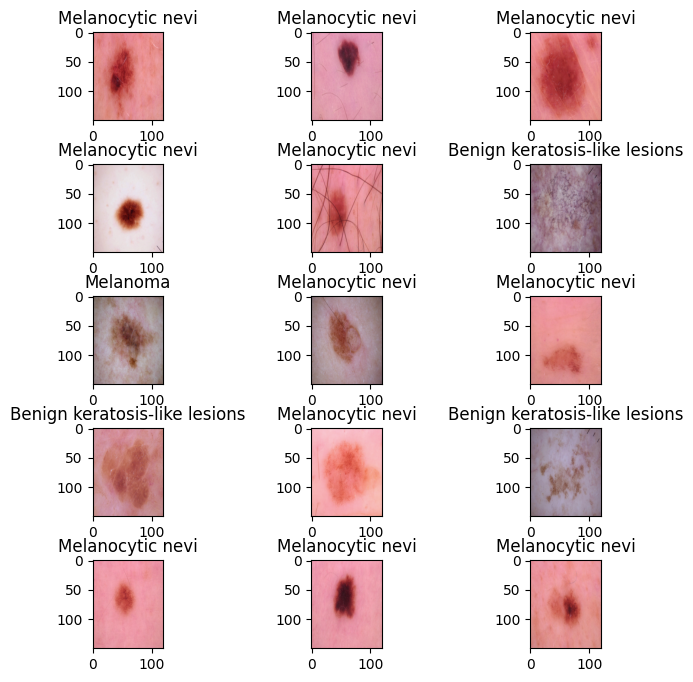

In [ ]:
class_mapping = {
    tuple([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanoma",
    tuple([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanocytic nevi",
    tuple([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]): "Basal cell carcinoma",
    tuple([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]): "Acaic",
    tuple([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]): "Benign keratosis-like lesions",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]): "Dermatofibroma",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]): "Vascular lesions"
}

num_classes = 7
# create a plot with 15 subplots (5 rows, 3 columns), have 0.5 space between rows
f, axarr = plt.subplots(5,3, figsize = (8,8), gridspec_kw={'hspace': 0.5})
ctr = 0
for i in range(5):
  for j in range(3):
    axarr[i,j].imshow(sample_images[ctr])
    axarr[i,j].set_title(class_mapping[tuple(sample_labels[ctr])])
    ctr+=1

# Visualize Class Label Distribution

In [ ]:
class_labels.shape

(10015,)

In [ ]:
#class_labels = np.load("labels_name.npy")
categories, counts = np.unique(class_labels, return_counts=True)
category_counts = dict(zip(categories, counts))

Text(0.5, 1.0, 'Class distribution of the original dataset')

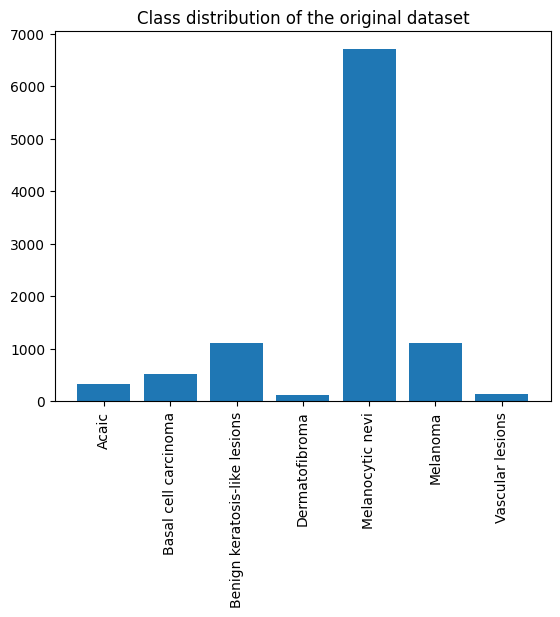

In [ ]:
plt.bar(categories, counts)
plt.xticks(rotation=90)
plt.title('Class distribution of the original dataset')

# Baseline Model

In [ ]:
from keras import models, layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.

    ### PUT YOUR CODE HERE ###
    # initialize the model
    model = models.Sequential() # data flows sequentially from input to output, one layer after another.

    # Add the first layer. Input shape is the shape of one image matrix.
    # Same padding retains the input shape at the output
    # 64 Filters of size 3x3 --> generate 64 featue maps
    model.add(layers.Conv2D(input_shape = (150,120,3),
                            filters = 64,
                            kernel_size =(3,3),
                            activation = 'relu',
                            strides= 1,
                            padding = 'same'))

    # for clarity, the input to the next layer is the output matrix of the layer before it
    # in this case, a matrix of 150x120 (the shape of the image) x 64 (number of feature maps)
    layer_1_output_shape = model.output_shape[1:]

    # add the second layer
    model.add(layers.Conv2D(input_shape = layer_1_output_shape,
                            filters = 32,
                            kernel_size = (3,3),
                            activation = 'relu',
                            strides = 1,
                            padding = 'same'))

    # add the third layer, Maxpool doesn't need to have the input shape defined
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    layer_3_output_shape = model.output_shape[1:]
    # add the 4th layer
    model.add(layers.Conv2D(input_shape = layer_3_output_shape,
                            filters = 64,
                            kernel_size = (3,3),
                            activation = 'relu',
                            strides = 1,
                            padding = 'same'))
    layer_4_output_shape = model.output_shape[1:]
    # add the 5th layer
    model.add(layers.Conv2D(input_shape = layer_4_output_shape,
                            filters = 32,
                            kernel_size = (3,3),
                            activation = 'relu',
                            strides = 1,
                            padding = 'same'))
    # add the 6th layer
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    # flatten the layer (i.e 37x30x32 = 35520)
    model.add(layers.Flatten())
    # add the final dense layers : densly connected feedforward networks
    model.add(layers.Dense(units = 32,
                           activation = 'relu'))
    model.add(layers.Dense(units = 32,
                           activation = 'relu'))
    # add the output layer : softmax because we want to categorize the output to 1 of 7 classes
    model.add(layers.Dense(units = num_classes,
                           activation = 'softmax'))
    ### END ###

    return model

In [ ]:
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 60, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 60, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 30, 32)        0         
 g2D)                                                   

In [ ]:
# compile the model ith the optimizer and loss function
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

## Train model

In [ ]:
# fit the baseline model
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data=(X_val,y_val))




Epoch 1/10
188/188 [==============================] - 31s 62ms/step - loss: 1.0545 - accuracy: 0.6555 - val_loss: 0.9682 - val_accuracy: 0.6630
Epoch 2/10
188/188 [==============================] - 8s 45ms/step - loss: 0.9299 - accuracy: 0.6682 - val_loss: 0.9122 - val_accuracy: 0.6685
Epoch 3/10
188/188 [==============================] - 10s 51ms/step - loss: 0.8893 - accuracy: 0.6785 - val_loss: 0.8769 - val_accuracy: 0.6770
Epoch 4/10
188/188 [==============================] - 10s 51ms/step - loss: 0.8547 - accuracy: 0.6878 - val_loss: 0.8426 - val_accuracy: 0.6935
Epoch 5/10
188/188 [==============================] - 10s 54ms/step - loss: 0.8126 - accuracy: 0.6980 - val_loss: 0.8587 - val_accuracy: 0.6800
Epoch 6/10
188/188 [==============================] - 10s 51ms/step - loss: 0.7803 - accuracy: 0.7114 - val_loss: 0.8121 - val_accuracy: 0.6965
Epoch 7/10
188/188 [==============================] - 9s 49ms/step - loss: 0.7249 - accuracy: 0.7342 - val_loss: 0.8244 - val_accuracy: 0

#### Save model and history

In [ ]:
#np.save('my_history.npy',history.history)
#model.save('baseline.keras')

#### Load model and history

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/Tilburg/Masters CSAI/Year 1 - Semester 1/Deep Learning/Project/baseline.keras')

In [ ]:
## get the scores from numpy the saved object, uncomment below
history=np.load('my_history.npy',allow_pickle='TRUE').item()
train_acc = history['accuracy']
val_acc = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']

# from the trained model history
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

## Baseline performance

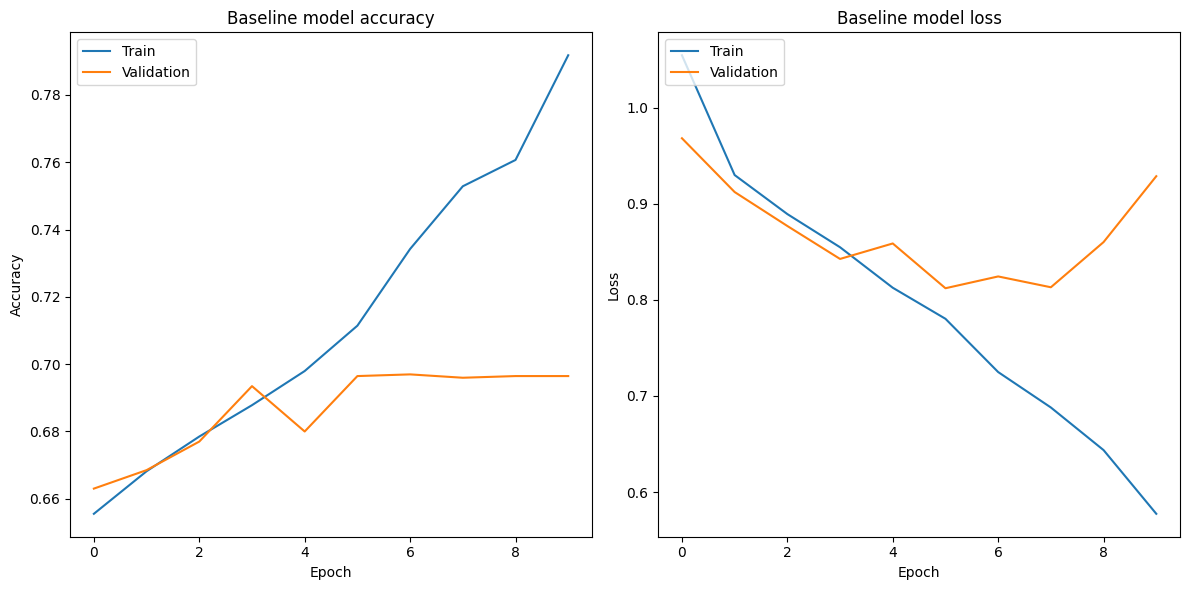

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Baseline model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Baseline model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
test_predictions = model.predict(X_test)
# predictions are returned as probabilities
# i.e, the output of the softmax function which returns
# a probability distribution of all the classes.
# that is, each prediction is a vector of length 6 where each element
# is the probability that the given example is of a given class (i.e the index)
# to get the answer, we get the index of the highest probability
test_predicted_classes = np.argmax(test_predictions, axis = 1)

63/63 [==============================] - 10s 17ms/step


In [ ]:
# print a sample of predicted classes
from random import sample
sample(list(test_predicted_classes),10)

[0, 1, 1, 1, 4, 1, 1, 1, 2, 4]

In [ ]:
test_true_classes = np.argmax(y_test, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(test_true_classes),10)

[6, 1, 1, 0, 1, 1, 0, 1, 1, 1]

In [ ]:
class_index_mapping = {
    0 : "Melanoma (class 0)",
    1 : "Melanocytic nevi (class 1)",
    2 : "Basal cell carcinoma (class 2)",
    3 : "Acaic (class 3)",
    4 : "Benign keratosis-like lesions (class 4)",
    5 : "Dermatofibroma (class 5)",
    6 : "Vascular lesions (class 6)"
}


In [ ]:
# performance on validation set
validation_predictions = model.predict(X_val)
validation_predicted_classes = np.argmax(validation_predictions, axis = 1)
valid_true_classes = np.argmax(y_val, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(valid_true_classes),10)

63/63 [==============================] - 1s 11ms/step


[1, 1, 1, 1, 6, 0, 1, 1, 1, 1]

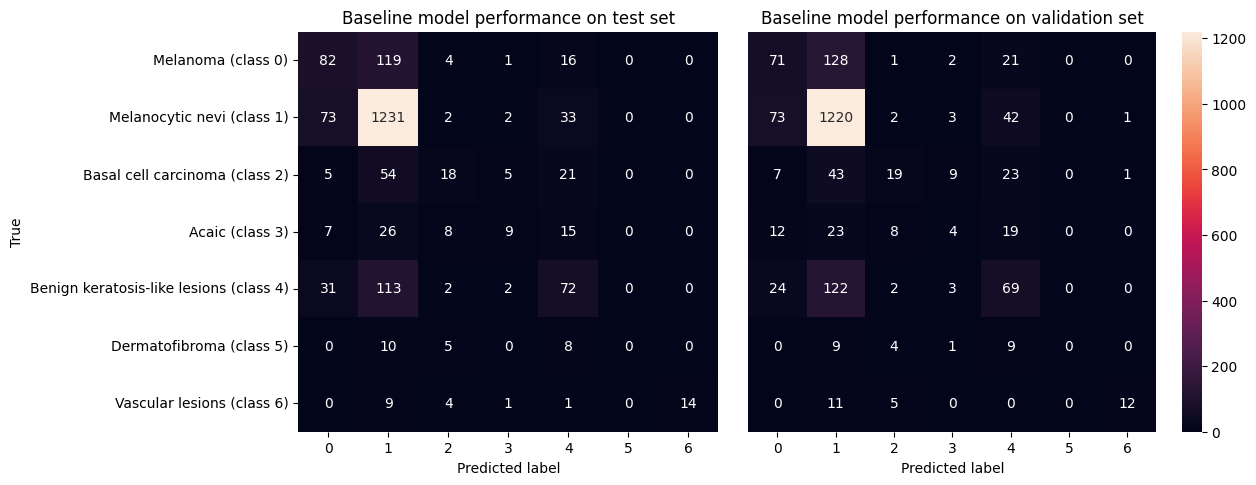

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix - test set
confusion_test = confusion_matrix(test_true_classes, test_predicted_classes)
class_labels_nums = [class_index_mapping[i] for i in range(len(class_index_mapping))]

# Confusion matrix - validation set
confusion_valid = confusion_matrix(valid_true_classes, validation_predicted_classes)

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Define the position and size of each subplot [left, bottom, width, height]
ax1 = fig.add_axes([0.15, 0.1, 0.35, 0.8])  # Left plot
ax2 = fig.add_axes([0.525, 0.1, 0.425, 0.8])  # Right plot

# Plotting the test set confusion matrix
sns.heatmap(confusion_test, annot=True, fmt="d", yticklabels=class_labels_nums, cbar=False, ax=ax1)
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True')
ax1.set_title('Baseline model performance on test set')

# Plotting the validation set confusion matrix
sns.heatmap(confusion_valid, annot=True, fmt="d", yticklabels=False, ax=ax2)
ax2.set_xlabel('Predicted label')
ax2.set_title('Baseline model performance on validation set')

plt.show()


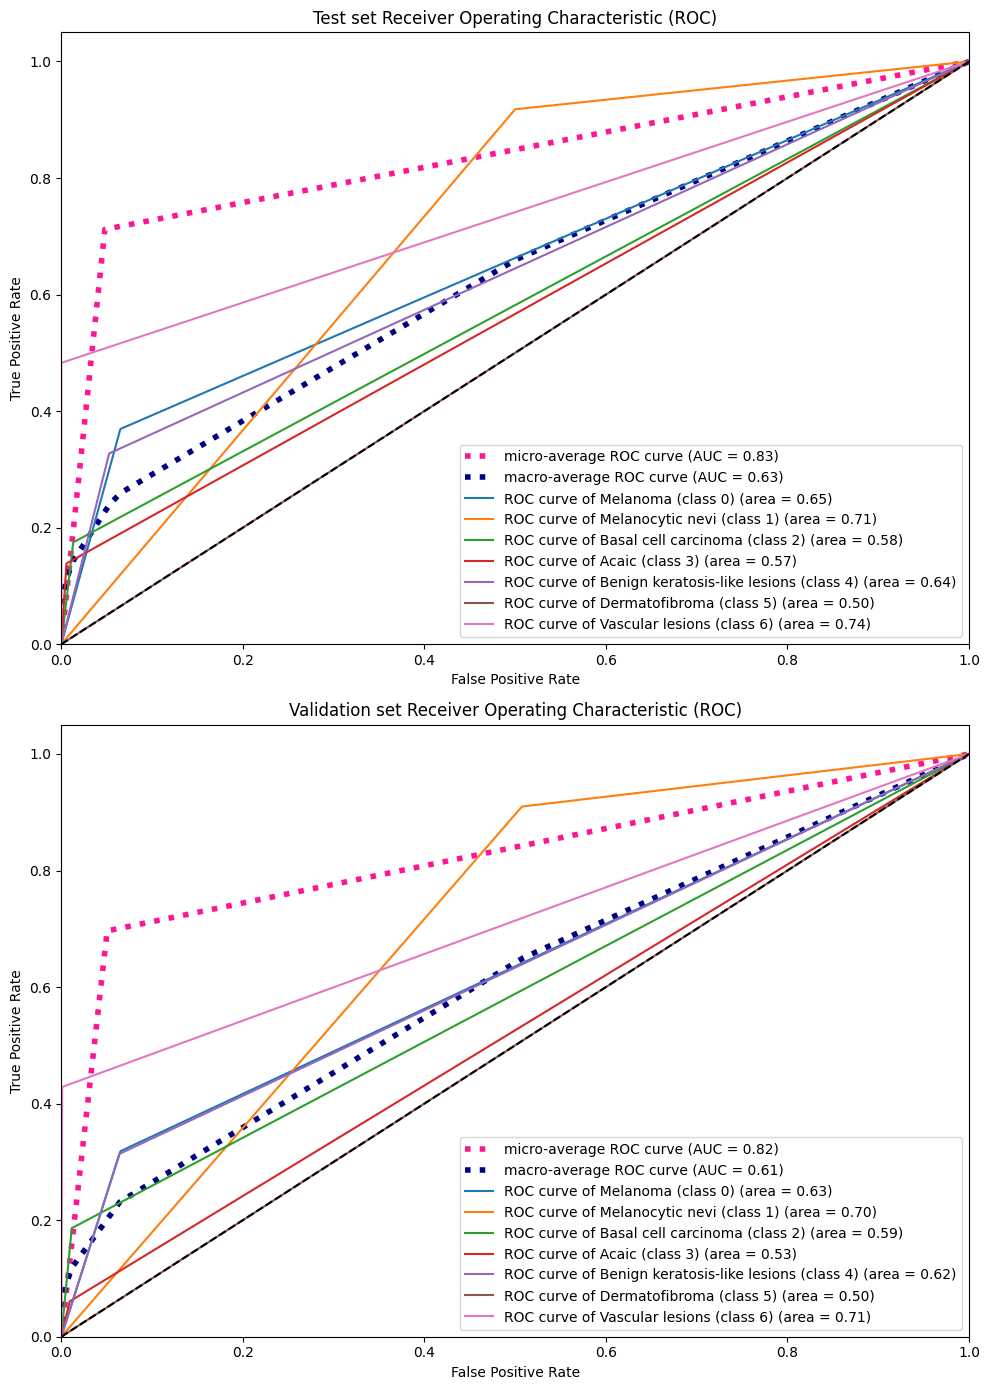

In [ ]:
# ROC and AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
test_one_hot_predictions = label_binarize(test_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])
valid_one_hot_predictions = label_binarize(validation_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])

fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()

# TEST SET VALUES #
# test set values
for i in range(num_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test[:,i], test_one_hot_predictions[:,i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# test set auc Macro
fpr_grid = np.linspace(0.0,1,1000)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr += np.interp(fpr_grid, fpr_test[i], tpr_test[i])

mean_tpr /= num_classes
fpr_test['macro'] = fpr_grid
tpr_test['macro'] = mean_tpr
roc_auc_test['macro'] = auc(fpr_test['macro'], tpr_test['macro'])

# test set auc micro
fpr_test['micro'], tpr_test['micro'], _ = roc_curve(y_test.ravel(),test_one_hot_predictions.ravel())
roc_auc_test['micro'] = auc(fpr_test['micro'], tpr_test['micro'])

#------------------------------------------------------------#
# VALIDATION SET VALUES
# validation set auc Macro


# validation set values
for i in range(num_classes):
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val[:,i], valid_one_hot_predictions[:,i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

fpr_grid = np.linspace(0.0,1,1000)
mean_tpr_val = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr_val += np.interp(fpr_grid, fpr_val[i], tpr_val[i])

mean_tpr_val /= num_classes
fpr_val['macro'] = fpr_grid
tpr_val['macro'] = mean_tpr_val
roc_auc_val['macro'] = auc(fpr_val['macro'], tpr_val['macro'])

# validation set auc micro
fpr_val['micro'], tpr_val['micro'], _ = roc_curve(y_val.ravel(),valid_one_hot_predictions.ravel())
roc_auc_val['micro'] = auc(fpr_val['micro'], tpr_val['micro'])

# PLOTTING #
# Adjust the figure size for vertical layout
plt.figure(figsize=(10, 14))

# Test Set Plot
plt.subplot(2, 1, 1)  # Change to 2 rows, 1 column, 1st plot
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_test['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_test["macro"],
    tpr_test["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_test['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test set Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Validation Set Plot
plt.subplot(2, 1, 2)  # Change to 2 rows, 1 column, 2nd plot
plt.plot(
    fpr_val["micro"],
    tpr_val["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_val['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_val["macro"],
    tpr_val["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_val['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_val[i], tpr_val[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_val[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation set Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
class_index_mapping = {
    0 : "Melanoma (class 0)",
    1 : "Melanocytic nevi (class 1)",
    2 : "Basal cell carcinoma (class 2)",
    3 : "Acaic (class 3)",
    4 : "Benign keratosis-like lesions (class 4)",
    5 : "Dermatofibroma (class 5)",
    6 : "Vascular lesions (class 6)"
}

# Extract class names from the mapping in the order of their indices
class_names = [class_index_mapping[i] for i in range(len(class_index_mapping))]

# Classification report
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.simplefilter('ignore', UndefinedMetricWarning)
print(classification_report(test_true_classes, test_predicted_classes, target_names=class_names))


                                         precision    recall  f1-score   support

                     Melanoma (class 0)       0.45      0.23      0.30       222
             Melanocytic nevi (class 1)       0.80      0.93      0.86      1341
         Basal cell carcinoma (class 2)       0.28      0.20      0.24       103
                        Acaic (class 3)       0.24      0.26      0.25        65
Benign keratosis-like lesions (class 4)       0.41      0.31      0.35       220
               Dermatofibroma (class 5)       0.00      0.00      0.00        23
             Vascular lesions (class 6)       0.43      0.31      0.36        29

                               accuracy                           0.70      2003
                              macro avg       0.37      0.32      0.34      2003
                           weighted avg       0.66      0.70      0.67      2003



## Test for dying RelU

In [ ]:
from keras.models import Model
def check_zero_activations(model, data, batch_size=10):
    # Iterate through each layer
    for layer_index, layer in enumerate(model.layers):
       if 'activation' in layer.get_config().keys():
        # Check if the layer has an 'activation' key and if it uses ReLU
        activation_config = layer.get_config()['activation']
        if (
            (isinstance(activation_config, dict) and activation_config.get('class_name', '') == 'ReLU') or
            activation_config == 'relu'
        ):
            #print(layer.get_config())
            # Create a sub-model that outputs the activations of the current layer
            sub_model = Model(inputs=model.input, outputs=layer.output)

            zero_activations = 0
            total_activations = 0

            # Process data in batches
            for i in range(0, len(data), batch_size):
                batch_data = data[i:i+batch_size]
                activations = sub_model.predict(batch_data)  # Get activations

                zero_activations += (activations == 0).sum()
                total_activations += activations.size

            # Calculate and print the percentage of zero activations
            print(f"Layer {layer_index} - {layer.name}: {100 * zero_activations / total_activations:.2f}% zero activations")

#print(X_val.shape)
small_random_sample = np.random.randint(0, X_val.shape[0], 20)
small_subset_data = X_val[small_random_sample]
check_zero_activations(model, small_subset_data)


1/1 [==============================] - 0s 29ms/step
Layer 0 - conv2d: 76.86% zero activations
1/1 [==============================] - 0s 29ms/step
Layer 1 - conv2d_1: 89.14% zero activations
1/1 [==============================] - 0s 67ms/step
Layer 3 - conv2d_2: 87.83% zero activations
1/1 [==============================] - 0s 82ms/step
Layer 4 - conv2d_3: 91.73% zero activations
1/1 [==============================] - 0s 66ms/step
Layer 7 - dense: 80.62% zero activations
1/1 [==============================] - 0s 83ms/step
Layer 8 - dense_1: 47.97% zero activations


# Enhanced Model

## Improving the model


1. Increase number of epochs to 100 with early stopping ( wait for 10 epochs without validation performance increase
2. Augment data for the under represented classes.
   1. The dataset is dominated by the Melanocytic nevi class. To address this, we will oversample from the other classes with data augmentation to bring the distribution closer together.
3. Change activation function to leaky ReLu
4. He Initialization
5. Batch normalization

  



### Generating augmented data for the minority classes

In [ ]:
# 1. get the indices of the minority classes in X_train.
#     1. To do that, need to figure out the minority classes in y_train
#        1. y_train is one-hot encoded.
#        2. need to use the class_mapping to figure out which is which
# 2. once we have the indices of the minority classes, use it to subset thet training set
# 3. Seperate the indices out into those of different classes for generating the augmented labels later
#    1. That is, the 'seperated_minority_classes' is dictionary where the keys are the class label and the values
#       are lists containing the indicies in the the training data corressponding to thos images
from collections import defaultdict
seperated_minority_classes = defaultdict(list)

for image_index in range(len(y_train)):
  if class_mapping[tuple(y_train[image_index])] != 'Melanocytic nevi':
    seperated_minority_classes[class_mapping[tuple(y_train[image_index])]].append(image_index)


In [ ]:
class_index_mapping = {
    0 : "Melanoma",
    1 : "Melanocytic nevi",
    2 : "Basal cell carcinoma",
    3 : "Acaic",
    4 : "Benign keratosis-like lesions",
    5 : "Dermatofibroma",
    6 : "Vascular lesions"
}

class_mapping = {
    tuple([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanoma",
    tuple([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]): "Melanocytic nevi",
    tuple([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]): "Basal cell carcinoma",
    tuple([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]): "Acaic",
    tuple([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]): "Benign keratosis-like lesions",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]): "Dermatofibroma",
    tuple([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]): "Vascular lesions"
}


In [ ]:
pwd

'/content/drive/MyDrive/Tilburg/Masters CSAI/Year 1 - Semester 1/Deep Learning/Project'

#### Data generation function

In [ ]:
import gc

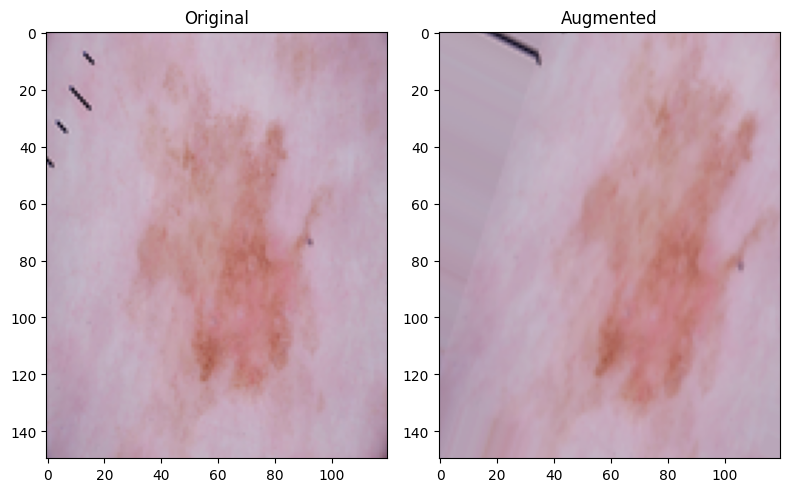

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ImageDataGenerator rotation
data_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# iterator
aug_iter = data_gen.flow(X_train[45:46,:,:], batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

# Original image
ax[0].imshow(X_train[45])
ax[0].set_title('Original')

# Augmented image
image = (next(aug_iter)[0]*255).astype('uint8')
ax[1].imshow(image)
ax[1].set_title('Augmented')

 # This sets the main title for the entire figure
plt.tight_layout()
plt.show()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from collections import defaultdict
from keras.preprocessing.image import save_img
import shutil
import os

# define generator
data_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

num_classes = 7
target_number_of_samples = 1000 #category_counts['Melanocytic nevi'] // 2
class_ctr = defaultdict(int)
augmented_images = []
augmented_labels = []
# Instead of saving the generated examples to memory
# store the examples to disk to be loaded during training later
# new examples are saved a png files
# generates samples until each class appromimately matches the size of Melanocytic nevi
for category in seperated_minority_classes:
  diff = target_number_of_samples - category_counts[category]
  for x_batch, y_batch in data_gen.flow(X_train[seperated_minority_classes[category]],y_train[seperated_minority_classes[category]],batch_size = diff,shuffle = False):
    class_ctr[category] += len(x_batch)
    augmented_images.extend(x_batch)
    augmented_labels.extend(y_batch)
    print(category, class_ctr[category])
    if class_ctr[category] >= (target_number_of_samples - category_counts[category]):
      break

X_train_combined = np.concatenate((X_train, np.array(augmented_images)))
# clear some space in memory
del X_train
gc.collect()
y_train_combined = np.concatenate((y_train, np.array(augmented_labels)))
del y_train
gc.collect()


Melanoma 555
Benign keratosis-like lesions 560
Vascular lesions 85
Vascular lesions 170
Vascular lesions 255
Vascular lesions 340
Vascular lesions 425
Vascular lesions 510
Vascular lesions 595
Vascular lesions 680
Vascular lesions 765
Vascular lesions 850
Vascular lesions 935
Basal cell carcinoma 309
Basal cell carcinoma 618
Dermatofibroma 69
Dermatofibroma 138
Dermatofibroma 207
Dermatofibroma 276
Dermatofibroma 345
Dermatofibroma 414
Dermatofibroma 483
Dermatofibroma 552
Dermatofibroma 621
Dermatofibroma 690
Dermatofibroma 759
Dermatofibroma 828
Dermatofibroma 897
Acaic 196
Acaic 392
Acaic 588
Acaic 784


0

Text(0.5, 1.0, 'Augmented samples generated for each class')

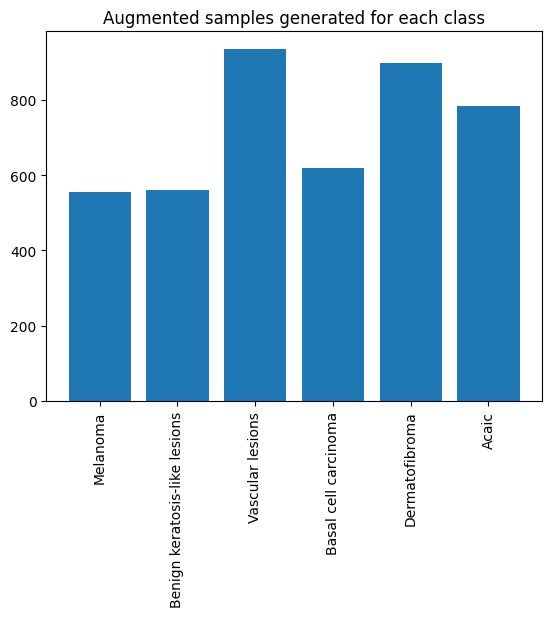

In [ ]:
plt.bar(list(class_ctr.keys()),list(class_ctr.values()))
plt.xticks(rotation=90)
plt.title("Augmented samples generated for each class")

In [ ]:
print(X_train_combined.shape)
print(y_train_combined.shape)

(10358, 150, 120, 3)
(10358, 7)


In [ ]:
np.save('X_train_combined.npy', X_train_combined)
np.save('y_train_combined.npy',y_train_combined)

### Augmenting the model

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### Training the augmented model with augmented data

In [ ]:
X_train_combined = np.load('X_train_combined.npy')
y_train_combined = np.load('y_train_combined.npy')

In [ ]:
num_classes = 7

In [ ]:
from keras import models, layers
from keras.layers import LeakyReLU, BatchNormalization

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.

    # initialize the model
    model = models.Sequential() # data flows sequentially from input to output, one layer after another.

    # Add the first layer. Input shape is the shape of one image matrix.
    # Same padding retains the input shape at the output
    # 64 Filters of size 3x3 --> generate 64 feature maps
    model.add(layers.Conv2D(input_shape = (150,120,3),
                            filters = 64,
                            kernel_size =(3,3),
                            activation = None,  # No activation at this point
                            strides= 1,
                            padding = 'same',
                            kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(LeakyReLU(alpha=0.01))  # Add the activation layer separately

    layer_1_output_shape = model.output_shape[1:]

    model.add(layers.Conv2D(input_shape = layer_1_output_shape,
                            filters = 32,
                            kernel_size = (3,3),
                            activation = None,  # No activation at this point
                            strides = 1,
                            padding = 'same',
                            kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(LeakyReLU(alpha=0.01))  # Add the activation layer separately

    model.add(layers.MaxPool2D(pool_size = (2,2)))
    layer_3_output_shape = model.output_shape[1:]

    model.add(layers.Conv2D(input_shape = layer_3_output_shape,
                            filters = 64,
                            kernel_size = (3,3),
                            activation = None,  # No activation at this point
                            strides = 1,
                            padding = 'same',
                            kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(LeakyReLU(alpha=0.01))  # Add the activation layer separately

    layer_4_output_shape = model.output_shape[1:]

    model.add(layers.Conv2D(input_shape = layer_4_output_shape,
                            filters = 32,
                            kernel_size = (3,3),
                            activation = None,  # No activation at this point
                            strides = 1,
                            padding = 'same',
                            kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(LeakyReLU(alpha=0.01))  # Add the activation layer separately

    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Flatten())

    model.add(layers.Dense(units = 32,
                           activation = None,  # No activation at this point
                           kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(LeakyReLU(alpha=0.01))  # Add the activation layer separately

    model.add(layers.Dense(units = 32,
                           activation = None,  # No activation at this point
                           kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(LeakyReLU(alpha=0.01))  # Add the activation layer separately

    model.add(layers.Dense(units = num_classes,
                           activation = 'softmax'))

    return model


In [ ]:
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True

model_augmented = build_model()
model_augmented.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 120, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 150, 120, 64)      256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 120, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 120, 32)      18464     
                                                                 
 batch_normalization_1 (Bat  (None, 150, 120, 32)      128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 120, 32)      0

In [ ]:
# compile the model ith the optimizer and loss function
model_augmented.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
import numpy as np
# train the model with the training data and labels for 50 epochs
# (i.e the model sees all the data 150 times when updating the weights)
# train using 32 images at a time.
# Number of iterations = # training examples / batch size

# fit the model with early stopping
# if the validation loss does not improve, stop
from keras.callbacks import EarlyStopping
# monitor the validation loss, wait for 5 epochs without performance improvments
# and restore the weights of the best performing state.
stop_training = EarlyStopping(monitor = 'val_loss',
                              patience=5,
                              restore_best_weights = True)

# load the saved data
# X_train_combined = np.load('augmented_X.npy')
# y_train_combined = np.load('augmented_y.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

# fit the baseline model
history = model_augmented.fit(X_train_combined, y_train_combined,
                    epochs = 100,
                    batch_size = 32,
                    validation_data=(X_val,y_val),
                    callbacks = [stop_training])

Epoch 1/100
324/324 [==============================] - 36s 76ms/step - loss: 1.2951 - accuracy: 0.5187 - val_loss: 0.9793 - val_accuracy: 0.6430
Epoch 2/100
324/324 [==============================] - 21s 66ms/step - loss: 1.0211 - accuracy: 0.6217 - val_loss: 0.9994 - val_accuracy: 0.6166
Epoch 3/100
324/324 [==============================] - 23s 70ms/step - loss: 0.9081 - accuracy: 0.6661 - val_loss: 0.7662 - val_accuracy: 0.7189
Epoch 4/100
324/324 [==============================] - 23s 70ms/step - loss: 0.8146 - accuracy: 0.6969 - val_loss: 0.9092 - val_accuracy: 0.6850
Epoch 5/100
324/324 [==============================] - 22s 67ms/step - loss: 0.7210 - accuracy: 0.7359 - val_loss: 0.7487 - val_accuracy: 0.7214
Epoch 6/100
324/324 [==============================] - 22s 67ms/step - loss: 0.6118 - accuracy: 0.7809 - val_loss: 0.9037 - val_accuracy: 0.6905
Epoch 7/100
324/324 [==============================] - 23s 70ms/step - loss: 0.4879 - accuracy: 0.8260 - val_loss: 0.8716 - val_ac

In [ ]:
np.save('history_augmented.npy',history.history)
model_augmented.save('augmented.keras')

### Test for dying RelU

In [ ]:
from keras.models import Model
import random

import tensorflow as tf
from tensorflow.keras.models import Model

def check_zero_activations(model, data, batch_size=10):
    # Iterate through each layer
    for layer_index, layer in enumerate(model.layers):
        is_next_layer_leaky_relu = (
            layer_index + 1 < len(model.layers) and
            isinstance(model.layers[layer_index + 1], tf.keras.layers.LeakyReLU)
        )
        # Check if the current layer is followed by LeakyReLU
        if is_next_layer_leaky_relu:
            # Create a sub-model that outputs the activations of the current layer
            sub_model = Model(inputs=model.input, outputs=layer.output)

            zero_activations = 0
            total_activations = 0

            # Process data in batches
            for i in range(0, len(data), batch_size):
                batch_data = data[i:i+batch_size]
                activations = sub_model.predict(batch_data)  # Get activations

                zero_activations += (activations == 0).sum()
                total_activations += activations.size

            # Calculate and print the percentage of zero activations
            print(f"Layer {layer_index} - {layer.name}: {100 * zero_activations / total_activations:.2f}% zero activations")



small_random_sample = np.random.randint(0, X_val.shape[0], 20)
small_subset_data = X_val[small_random_sample]
check_zero_activations(model_augmented, small_subset_data)


1/1 [==============================] - 0s 116ms/step
Layer 1 - batch_normalization: 0.00% zero activations
1/1 [==============================] - 0s 91ms/step
Layer 4 - batch_normalization_1: 0.00% zero activations
1/1 [==============================] - 0s 48ms/step
Layer 8 - batch_normalization_2: 0.00% zero activations
1/1 [==============================] - 0s 28ms/step
Layer 11 - batch_normalization_3: 0.00% zero activations
1/1 [==============================] - 0s 37ms/step
Layer 16 - batch_normalization_4: 0.00% zero activations
1/1 [==============================] - 0s 31ms/step
Layer 19 - batch_normalization_5: 0.00% zero activations


### Augmented model metrics

In [ ]:
## get the scores from numpy the saved object, uncomment below
history=np.load('history_augmented.npy',allow_pickle='TRUE').item()
train_acc = history['accuracy']
val_acc = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']
import keras
model_augmented = keras.models.load_model('/content/drive/MyDrive/Tilburg/Masters CSAI/Year 1 - Semester 1/Deep Learning/Project/augmented.keras')

# # get the scores from trained model in memory, if not loading
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

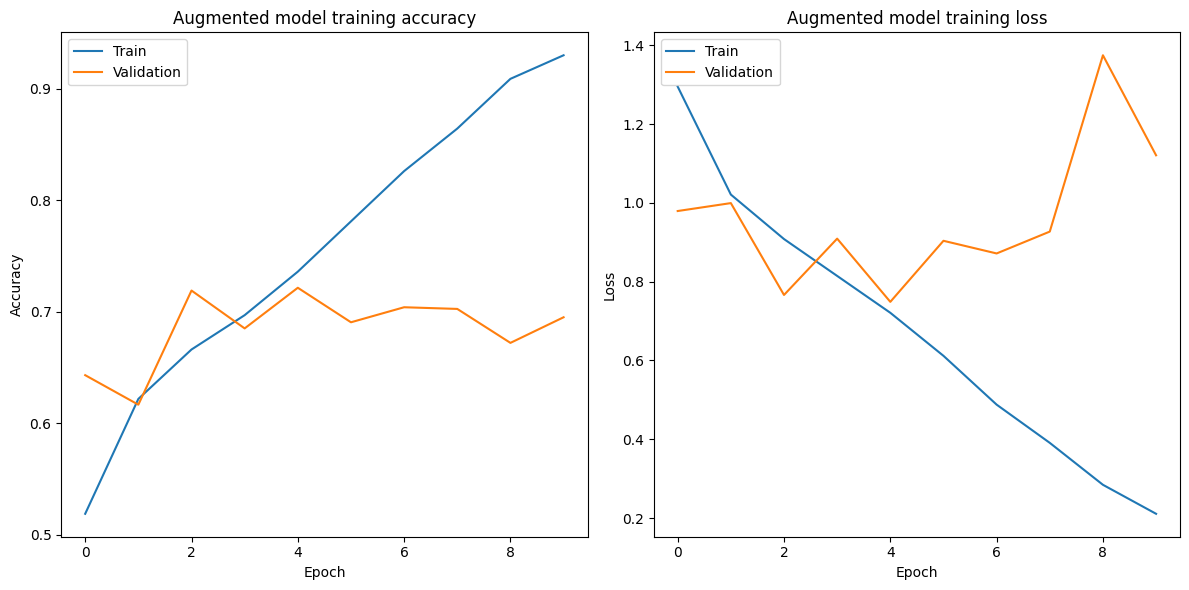

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Augmented model training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Augmented model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
test_predictions = model_augmented.predict(X_test)
# predictions are returned as probabilities
# i.e, the output of the softmax function which returns
# a probability distribution of all the classes.
# that is, each prediction is a vector of length 6 where each element
# is the probability that the given example is of a given class (i.e the index)
# to get the answer, we get the index of the highest probability
test_predicted_classes = np.argmax(test_predictions, axis = 1)

63/63 [==============================] - 4s 25ms/step


In [ ]:
# print a sample of predicted classes
from random import sample
sample(list(test_predicted_classes),10)

[1, 6, 1, 1, 1, 1, 1, 1, 5, 1]

In [ ]:
test_true_classes = np.argmax(y_test, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(test_true_classes),10)

[1, 1, 1, 0, 5, 1, 4, 4, 1, 1]

In [ ]:
class_index_mapping = {
    0 : "Melanoma (class 0)",
    1 : "Melanocytic nevi (class 1)",
    2 : "Basal cell carcinoma (class 2)",
    3 : "Acaic (class 3)",
    4 : "Benign keratosis-like lesions (class 4)",
    5 : "Dermatofibroma (class 5)",
    6 : "Vascular lesions (class 6)"
}


In [ ]:
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

In [ ]:
# performance on validation set
validation_predictions = model_augmented.predict(X_val)
validation_predicted_classes = np.argmax(validation_predictions, axis = 1)
valid_true_classes = np.argmax(y_val, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(valid_true_classes),10)

63/63 [==============================] - 1s 19ms/step


[0, 1, 1, 1, 2, 1, 1, 1, 1, 2]

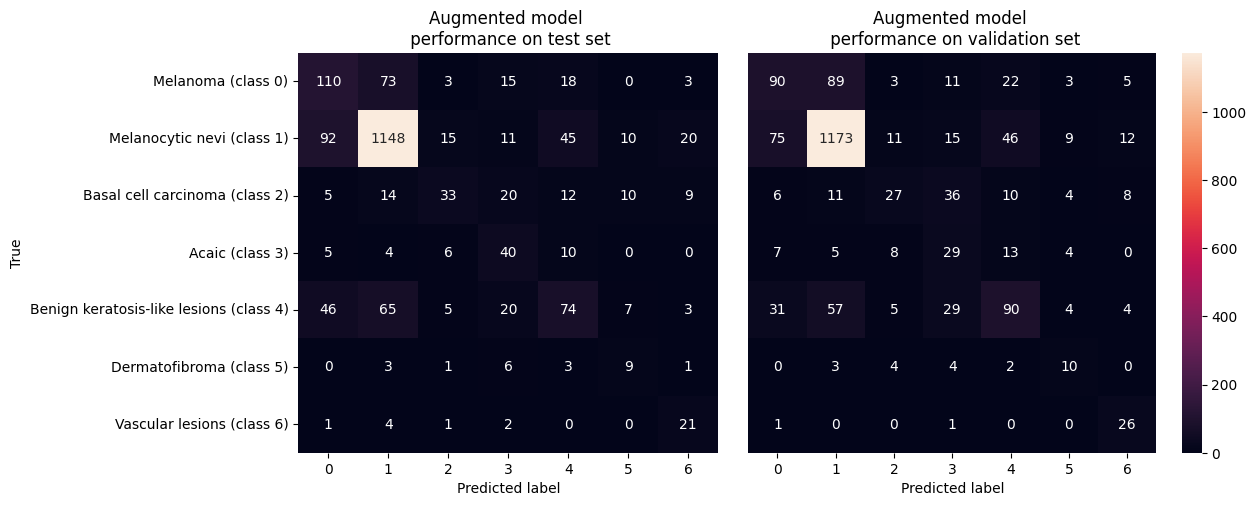

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix - test set
confusion_test = confusion_matrix(test_true_classes, test_predicted_classes)
class_labels_nums = [class_index_mapping[i] for i in range(len(class_index_mapping))]

# Confusion matrix - validation set
confusion_valid = confusion_matrix(valid_true_classes, validation_predicted_classes)

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Define the position and size of each subplot [left, bottom, width, height]
ax1 = fig.add_axes([0.15, 0.1, 0.35, 0.8])  # Left plot
ax2 = fig.add_axes([0.525, 0.1, 0.425, 0.8])  # Right plot

# Plotting the test set confusion matrix
sns.heatmap(confusion_test, annot=True, fmt="d", yticklabels=class_labels_nums, cbar=False, ax=ax1)
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True')
ax1.set_title('Augmented model \n performance on test set')

# Plotting the validation set confusion matrix
sns.heatmap(confusion_valid, annot=True, fmt="d", yticklabels=False, ax=ax2)
ax2.set_xlabel('Predicted label')
ax2.set_title('Augmented model \n performance on validation set')

plt.show()


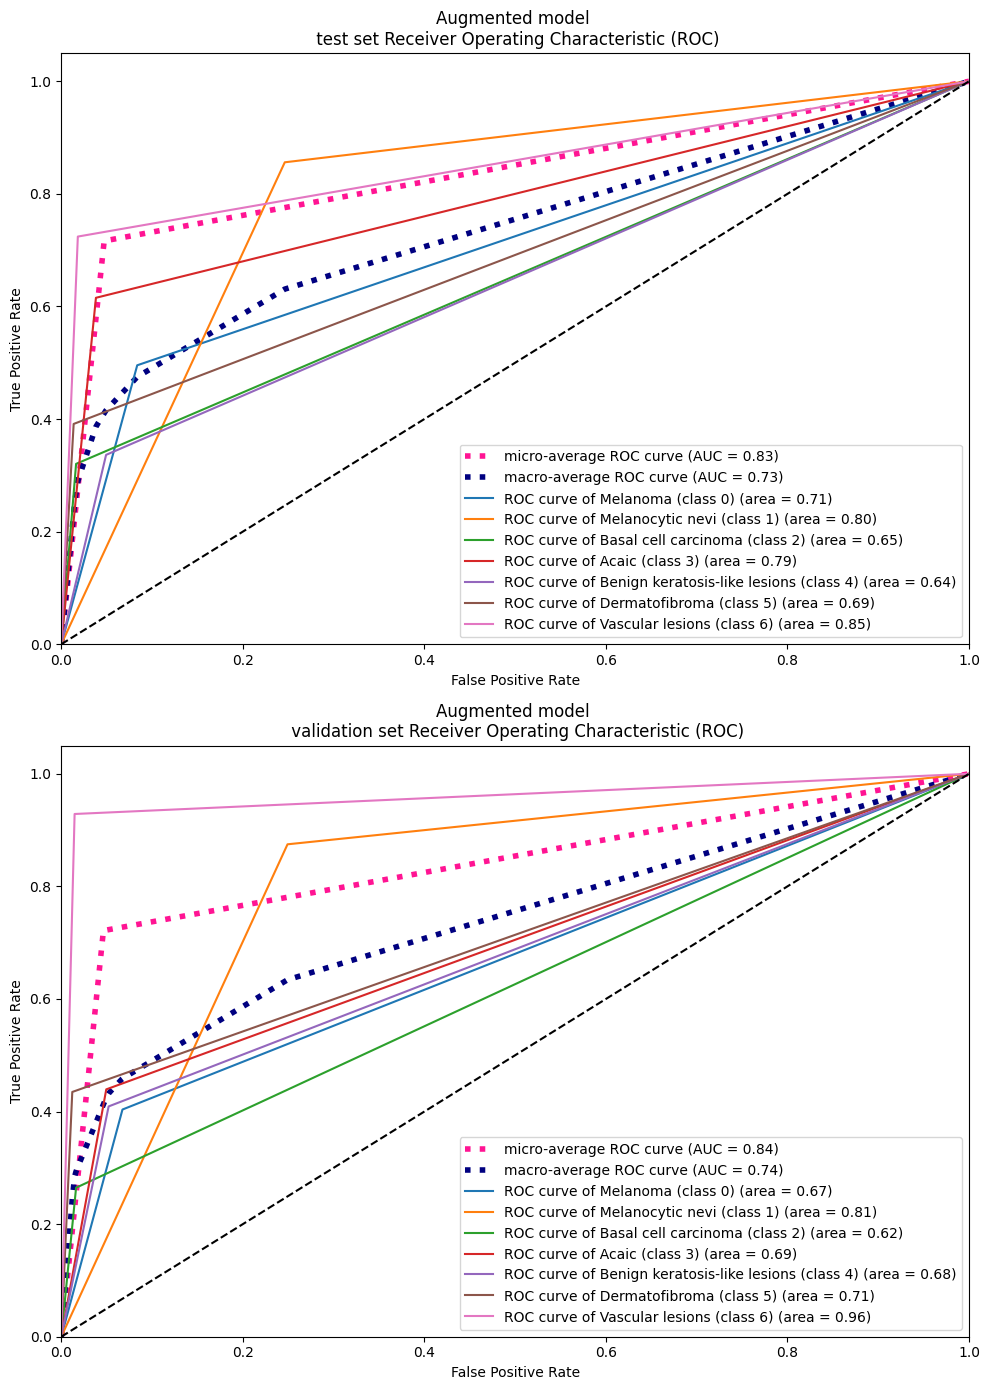

In [ ]:
# ROC and AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
test_one_hot_predictions = label_binarize(test_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])
valid_one_hot_predictions = label_binarize(validation_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])

fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()
num_classes = 7

# TEST SET VALUES #
# test set values
for i in range(num_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test[:,i], test_one_hot_predictions[:,i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# test set auc Macro
fpr_grid = np.linspace(0.0,1,1000)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr += np.interp(fpr_grid, fpr_test[i], tpr_test[i])

mean_tpr /= num_classes
fpr_test['macro'] = fpr_grid
tpr_test['macro'] = mean_tpr
roc_auc_test['macro'] = auc(fpr_test['macro'], tpr_test['macro'])

# test set auc micro
fpr_test['micro'], tpr_test['micro'], _ = roc_curve(y_test.ravel(),test_one_hot_predictions.ravel())
roc_auc_test['micro'] = auc(fpr_test['micro'], tpr_test['micro'])

#------------------------------------------------------------#
# VALIDATION SET VALUES
# validation set auc Macro


# validation set values
for i in range(num_classes):
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val[:,i], valid_one_hot_predictions[:,i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

fpr_grid = np.linspace(0.0,1,1000)
mean_tpr_val = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr_val += np.interp(fpr_grid, fpr_val[i], tpr_val[i])

mean_tpr_val /= num_classes
fpr_val['macro'] = fpr_grid
tpr_val['macro'] = mean_tpr_val
roc_auc_val['macro'] = auc(fpr_val['macro'], tpr_val['macro'])

# validation set auc micro
fpr_val['micro'], tpr_val['micro'], _ = roc_curve(y_val.ravel(),valid_one_hot_predictions.ravel())
roc_auc_val['micro'] = auc(fpr_val['micro'], tpr_val['micro'])

# PLOTTING #
# Adjust the figure size for vertical layout
plt.figure(figsize=(10, 14))

# Test Set Plot
plt.subplot(2, 1, 1)  # Change to 2 rows, 1 column, 1st plot
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_test['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_test["macro"],
    tpr_test["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_test['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Augmented model \n test set Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Validation Set Plot
plt.subplot(2, 1, 2)  # Change to 2 rows, 1 column, 2nd plot
plt.plot(
    fpr_val["micro"],
    tpr_val["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_val['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_val["macro"],
    tpr_val["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_val['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_val[i], tpr_val[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_val[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Augmented model \n validation set Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
class_index_mapping = {
    0 : "Melanoma (class 0)",
    1 : "Melanocytic nevi (class 1)",
    2 : "Basal cell carcinoma (class 2)",
    3 : "Acaic (class 3)",
    4 : "Benign keratosis-like lesions (class 4)",
    5 : "Dermatofibroma (class 5)",
    6 : "Vascular lesions (class 6)"
}

# Extract class names from the mapping in the order of their indices
class_names = [class_index_mapping[i] for i in range(len(class_index_mapping))]

# Classification report
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.simplefilter('ignore', UndefinedMetricWarning)
print(classification_report(test_true_classes, test_predicted_classes, target_names=class_names))


                                         precision    recall  f1-score   support

                     Melanoma (class 0)       0.42      0.50      0.46       222
             Melanocytic nevi (class 1)       0.88      0.86      0.87      1341
         Basal cell carcinoma (class 2)       0.52      0.32      0.40       103
                        Acaic (class 3)       0.35      0.62      0.45        65
Benign keratosis-like lesions (class 4)       0.46      0.34      0.39       220
               Dermatofibroma (class 5)       0.25      0.39      0.31        23
             Vascular lesions (class 6)       0.37      0.72      0.49        29

                               accuracy                           0.72      2003
                              macro avg       0.46      0.53      0.48      2003
                           weighted avg       0.73      0.72      0.72      2003



# Transfer Learning Model

In [ ]:
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

## Training with original data with no fine tuning

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
import keras
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 120, 3))

# # freeze the base layers
for layer in pretrained_model.layers:
    layer.trainable = False


from keras.callbacks import EarlyStopping
stop_training = EarlyStopping(monitor = 'val_loss',
                              patience=5,
                              restore_best_weights = True)


# Add our custom layers
x = pretrained_model.output
x = keras.layers.Flatten()(x)
# Dense layers as specified in the paper
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Final layer with 7 neurons for classification

model = Model(inputs=pretrained_model.input, outputs=predictions)


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 120, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 126, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 60, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 60, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size = 32,
                    validation_data=(X_val,y_val),
                    callbacks = [stop_training])

Epoch 1/20
188/188 [==============================] - 36s 126ms/step - loss: 1.6272 - accuracy: 0.6572 - val_loss: 1.1257 - val_accuracy: 0.6695
Epoch 2/20
188/188 [==============================] - 19s 99ms/step - loss: 1.1237 - accuracy: 0.6700 - val_loss: 1.1818 - val_accuracy: 0.6700
Epoch 3/20
188/188 [==============================] - 18s 94ms/step - loss: 1.0939 - accuracy: 0.6727 - val_loss: 1.0871 - val_accuracy: 0.6715
Epoch 4/20
188/188 [==============================] - 20s 106ms/step - loss: 1.0876 - accuracy: 0.6740 - val_loss: 1.0588 - val_accuracy: 0.6745
Epoch 5/20
188/188 [==============================] - 20s 105ms/step - loss: 1.0671 - accuracy: 0.6707 - val_loss: 1.0513 - val_accuracy: 0.6805
Epoch 6/20
188/188 [==============================] - 20s 105ms/step - loss: 1.0644 - accuracy: 0.6748 - val_loss: 1.0217 - val_accuracy: 0.6780
Epoch 7/20
188/188 [==============================] - 16s 87ms/step - loss: 1.0393 - accuracy: 0.6768 - val_loss: 1.1276 - val_accur

In [ ]:
np.save('no_fine_tune_transfer_history.npy',history.history)
model.save('no_fine_tune_transfer.keras')


In [ ]:
# ## get the scores from numpy the saved object, uncomment below
# history=np.load('history_transfer.npy',allow_pickle='TRUE').item()
# train_acc = history['accuracy']
# val_acc = history['val_accuracy']
# train_loss = history['loss']
# val_loss = history['val_loss']

# from the trained model history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

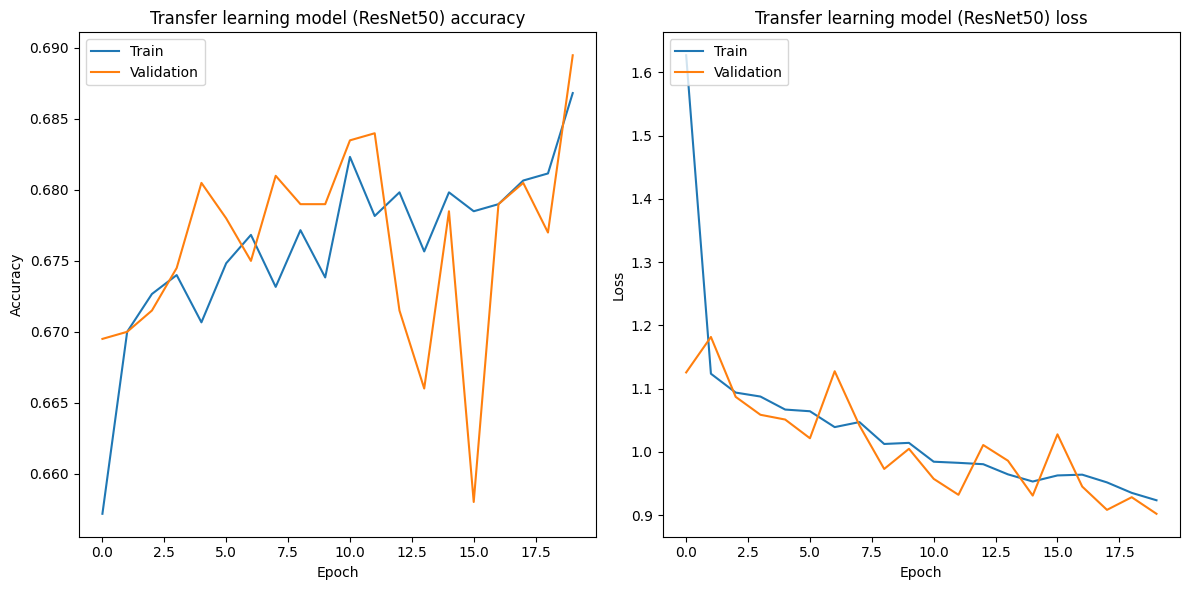

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Transfer learning model (ResNet50) accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Transfer learning model (ResNet50) loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
test_predictions = model.predict(X_test)
# predictions are returned as probabilities
# i.e, the output of the softmax function which returns
# a probability distribution of all the classes.
# that is, each prediction is a vector of length 6 where each element
# is the probability that the given example is of a given class (i.e the index)
# to get the answer, we get the index of the highest probability
test_predicted_classes = np.argmax(test_predictions, axis = 1)

63/63 [==============================] - 5s 44ms/step


In [ ]:
# print a sample of predicted classes
from random import sample
sample(list(test_predicted_classes),10)

[1, 1, 1, 1, 4, 1, 1, 0, 1, 1]

In [ ]:
test_true_classes = np.argmax(y_test, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(test_true_classes),10)

[1, 0, 4, 1, 0, 1, 1, 1, 1, 1]

In [ ]:
# performance on validation set
validation_predictions = model.predict(X_val)
validation_predicted_classes = np.argmax(validation_predictions, axis = 1)
valid_true_classes = np.argmax(y_val, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(valid_true_classes),10)

63/63 [==============================] - 3s 44ms/step


[1, 0, 1, 1, 1, 1, 1, 1, 1, 3]

In [ ]:
class_index_mapping = {
    0 : "Melanoma (class 0)",
    1 : "Melanocytic nevi (class 1)",
    2 : "Basal cell carcinoma (class 2)",
    3 : "Acaic (class 3)",
    4 : "Benign keratosis-like lesions (class 4)",
    5 : "Dermatofibroma (class 5)",
    6 : "Vascular lesions (class 6)"
}


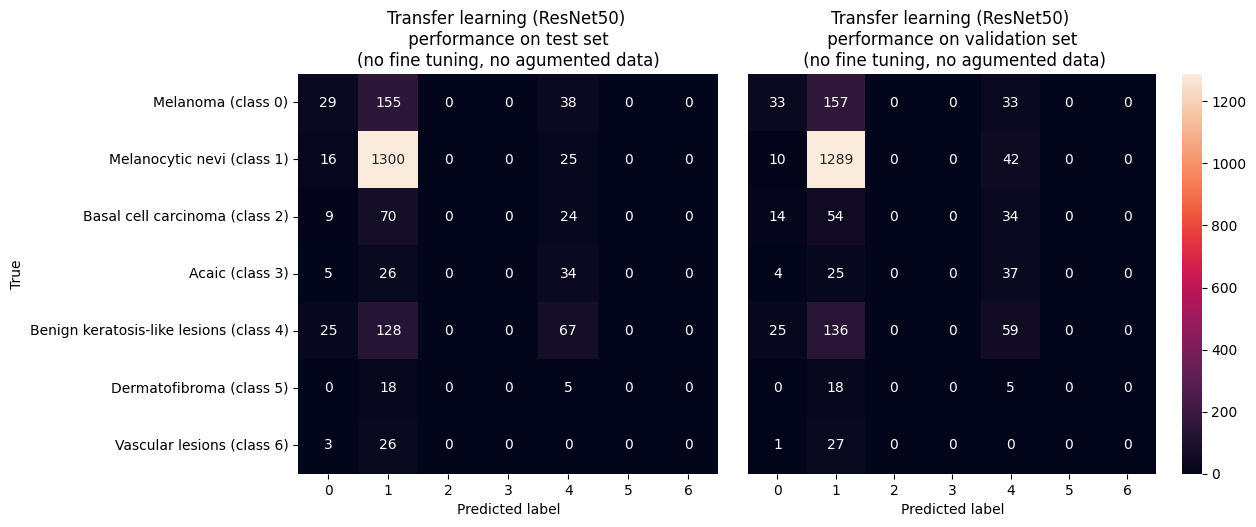

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix - test set
confusion_test = confusion_matrix(test_true_classes, test_predicted_classes)
class_labels_nums = [class_index_mapping[i] for i in range(len(class_index_mapping))]

# Confusion matrix - validation set
confusion_valid = confusion_matrix(valid_true_classes, validation_predicted_classes)

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Define the position and size of each subplot [left, bottom, width, height]
ax1 = fig.add_axes([0.15, 0.1, 0.35, 0.8])  # Left plot
ax2 = fig.add_axes([0.525, 0.1, 0.425, 0.8])  # Right plot

# Plotting the test set confusion matrix
sns.heatmap(confusion_test, annot=True, fmt="d", yticklabels=class_labels_nums, cbar=False, ax=ax1)
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True')
ax1.set_title('Transfer learning (ResNet50) \n performance on test set \n(no fine tuning, no agumented data)')

# Plotting the validation set confusion matrix
sns.heatmap(confusion_valid, annot=True, fmt="d", yticklabels=False, ax=ax2)
ax2.set_xlabel('Predicted label')
ax2.set_title('Transfer learning (ResNet50) \n performance on validation set \n (no fine tuning, no agumented data)')

plt.show()


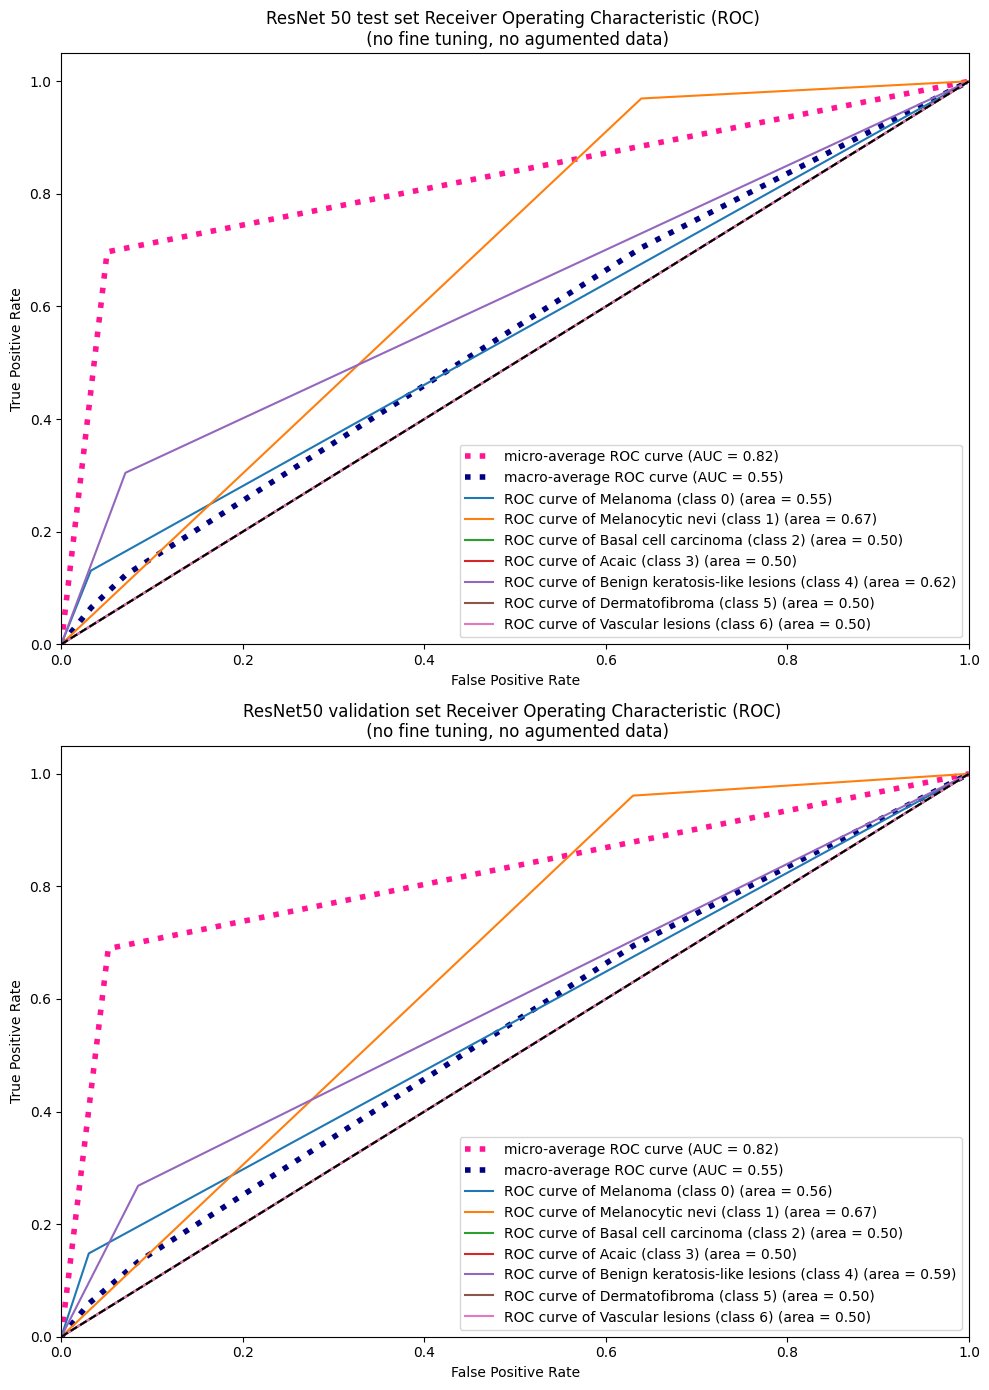

In [ ]:
num_classes = 7
# ROC and AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
test_one_hot_predictions = label_binarize(test_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])
valid_one_hot_predictions = label_binarize(validation_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])

fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()

# TEST SET VALUES #
# test set values
for i in range(num_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test[:,i], test_one_hot_predictions[:,i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# test set auc Macro
fpr_grid = np.linspace(0.0,1,1000)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr += np.interp(fpr_grid, fpr_test[i], tpr_test[i])

mean_tpr /= num_classes
fpr_test['macro'] = fpr_grid
tpr_test['macro'] = mean_tpr
roc_auc_test['macro'] = auc(fpr_test['macro'], tpr_test['macro'])

# test set auc micro
fpr_test['micro'], tpr_test['micro'], _ = roc_curve(y_test.ravel(),test_one_hot_predictions.ravel())
roc_auc_test['micro'] = auc(fpr_test['micro'], tpr_test['micro'])

#------------------------------------------------------------#
# VALIDATION SET VALUES
# validation set auc Macro


# validation set values
for i in range(num_classes):
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val[:,i], valid_one_hot_predictions[:,i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

fpr_grid = np.linspace(0.0,1,1000)
mean_tpr_val = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr_val += np.interp(fpr_grid, fpr_val[i], tpr_val[i])

mean_tpr_val /= num_classes
fpr_val['macro'] = fpr_grid
tpr_val['macro'] = mean_tpr_val
roc_auc_val['macro'] = auc(fpr_val['macro'], tpr_val['macro'])

# validation set auc micro
fpr_val['micro'], tpr_val['micro'], _ = roc_curve(y_val.ravel(),valid_one_hot_predictions.ravel())
roc_auc_val['micro'] = auc(fpr_val['micro'], tpr_val['micro'])

#---------------------------------------------#
# PLOTTING #
# Adjust the figure size for vertical layout
plt.figure(figsize=(10, 14))

# Test Set Plot
plt.subplot(2, 1, 1)  # Change to 2 rows, 1 column, 1st plot
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_test['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_test["macro"],
    tpr_test["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_test['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet 50 test set Receiver Operating Characteristic (ROC) \n (no fine tuning, no agumented data)')
plt.legend(loc="lower right")

# Validation Set Plot
plt.subplot(2, 1, 2)  # Change to 2 rows, 1 column, 2nd plot
plt.plot(
    fpr_val["micro"],
    tpr_val["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_val['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_val["macro"],
    tpr_val["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_val['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_val[i], tpr_val[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_val[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet50 validation set Receiver Operating Characteristic (ROC) \n (no fine tuning, no agumented data)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.simplefilter('ignore', UndefinedMetricWarning)
print(classification_report(test_true_classes, test_predicted_classes))

              precision    recall  f1-score   support

           0       0.33      0.13      0.19       222
           1       0.75      0.97      0.85      1341
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00        65
           4       0.35      0.30      0.32       220
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        29

    accuracy                           0.70      2003
   macro avg       0.20      0.20      0.19      2003
weighted avg       0.58      0.70      0.62      2003



## Training with augmented data and fine tuning

In [ ]:
# X_train_combined = np.load('X_train_combined.npy')
# y_train_combined = np.load('y_train_combined.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
import keras

pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 120, 3))

# Unfreeze the last few layers of the model
for layer in pretrained_model.layers[-3:]:  # Unfreeze the last N layers
    layer.trainable = True



from keras.callbacks import EarlyStopping
stop_training = EarlyStopping(monitor = 'val_loss',
                              patience=5,
                              restore_best_weights = True)


# Add our custom layers
x = pretrained_model.output
x = keras.layers.Flatten()(x)
# Dense layers as specified in the paper
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Final layer with 7 neurons for classification

model = Model(inputs=pretrained_model.input, outputs=predictions)


94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
# Get the details of the last 3 layers
last_3_layers = [(layer.name, type(layer).__name__, layer.trainable) for layer in pretrained_model.layers[-3:]]

# Output: (Layer Name, Layer Type, Is Trainable)
print(last_3_layers)

[('conv5_block3_3_bn', 'BatchNormalization', True), ('conv5_block3_add', 'Add', True), ('conv5_block3_out', 'Activation', True)]


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

### Train ResNet50 from scratch with

In [ ]:

# history = model.fit(X_train_combined, y_train_combined,
#                     epochs = 20,
#                     batch_size = 32,
#                     validation_data=(X_val,y_val),
#                     callbacks = [stop_training])

Epoch 1/20
324/324 [==============================] - 123s 211ms/step - loss: 0.9384 - accuracy: 0.6656 - val_loss: 14.0268 - val_accuracy: 0.1098
Epoch 2/20
324/324 [==============================] - 60s 183ms/step - loss: 0.2062 - accuracy: 0.9397 - val_loss: 15.0863 - val_accuracy: 0.1133
Epoch 3/20
324/324 [==============================] - 61s 189ms/step - loss: 0.0704 - accuracy: 0.9845 - val_loss: 1.6710 - val_accuracy: 0.4503
Epoch 4/20
324/324 [==============================] - 62s 191ms/step - loss: 0.0344 - accuracy: 0.9940 - val_loss: 0.7475 - val_accuracy: 0.7908
Epoch 5/20
324/324 [==============================] - 59s 183ms/step - loss: 0.0239 - accuracy: 0.9950 - val_loss: 0.7238 - val_accuracy: 0.7903
Epoch 6/20
324/324 [==============================] - 61s 187ms/step - loss: 0.0178 - accuracy: 0.9969 - val_loss: 0.7829 - val_accuracy: 0.7928
Epoch 7/20
324/324 [==============================] - 59s 181ms/step - loss: 0.0125 - accuracy: 0.9981 - val_loss: 0.8061 - val

In [ ]:
np.save('fine_tuned_aug_data_transfer_history.npy',history.history)
model.save('fine_tuned_aug_data_transfer.keras')

In [ ]:

# from the trained model history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

### Load saved model weights and history, trained on Nvida A40 GPU, Intel(R) Xeon(R) Gold 6248R CPU @ 3.00GHz

In [ ]:
#load weights
model.load_weights('fine_tuned_aug_data_transfer.h5')

## get the scores from numpy the saved object, uncomment below
history=np.load('fine_tuned_aug_data_transfer_history.npy',allow_pickle='TRUE').item()
train_acc = history['accuracy']
val_acc = history['val_accuracy']
train_loss = history['loss']
val_loss = history['val_loss']

### Fine-tuned transfer learning model with augmented data metrics

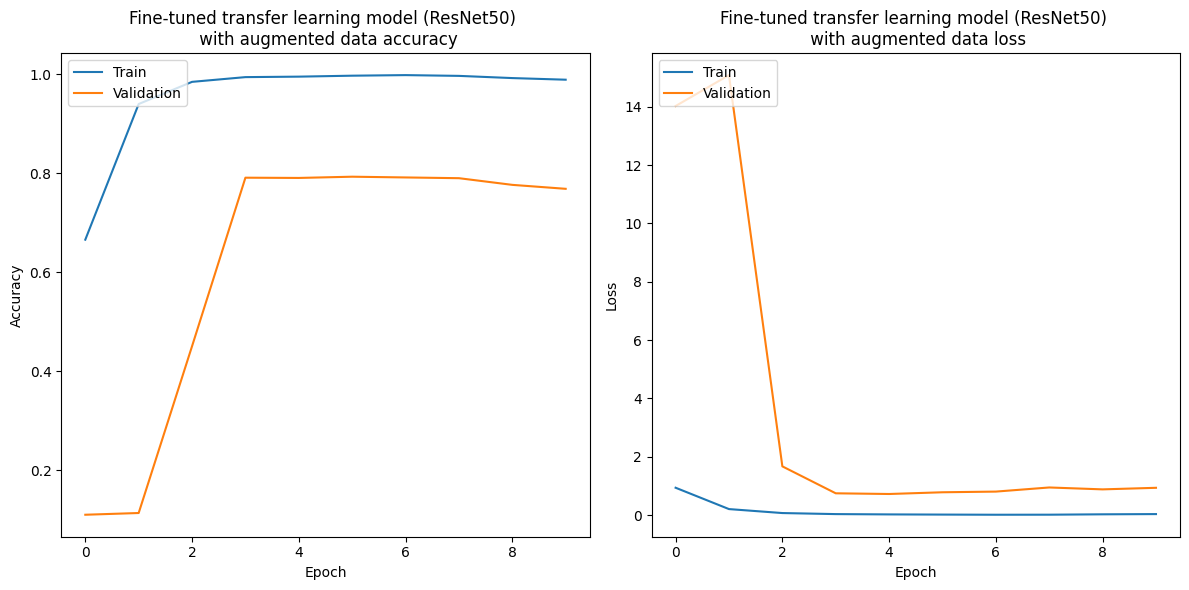

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Fine-tuned transfer learning model (ResNet50) \n with augmented data accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Fine-tuned transfer learning model (ResNet50) \n with augmented data loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
test_predictions = model.predict(X_test)
# predictions are returned as probabilities
# i.e, the output of the softmax function which returns
# a probability distribution of all the classes.
# that is, each prediction is a vector of length 6 where each element
# is the probability that the given example is of a given class (i.e the index)
# to get the answer, we get the index of the highest probability
test_predicted_classes = np.argmax(test_predictions, axis = 1)

63/63 [==============================] - 12s 48ms/step


In [ ]:
# print a sample of predicted classes
from random import sample
sample(list(test_predicted_classes),10)

[1, 1, 1, 1, 4, 1, 1, 1, 1, 1]

In [ ]:
test_true_classes = np.argmax(y_test, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(test_true_classes),10)

[1, 2, 1, 1, 1, 1, 4, 4, 1, 1]

In [ ]:
# performance on validation set
validation_predictions = model.predict(X_val)
validation_predicted_classes = np.argmax(validation_predictions, axis = 1)
valid_true_classes = np.argmax(y_val, axis = 1)
# print a sample of predicted classes
from random import sample
sample(list(valid_true_classes),10)

63/63 [==============================] - 2s 39ms/step


[2, 4, 1, 1, 4, 1, 2, 0, 1, 1]

In [ ]:
class_index_mapping = {
    0 : "Melanoma (class 0)",
    1 : "Melanocytic nevi (class 1)",
    2 : "Basal cell carcinoma (class 2)",
    3 : "Acaic (class 3)",
    4 : "Benign keratosis-like lesions (class 4)",
    5 : "Dermatofibroma (class 5)",
    6 : "Vascular lesions (class 6)"
}


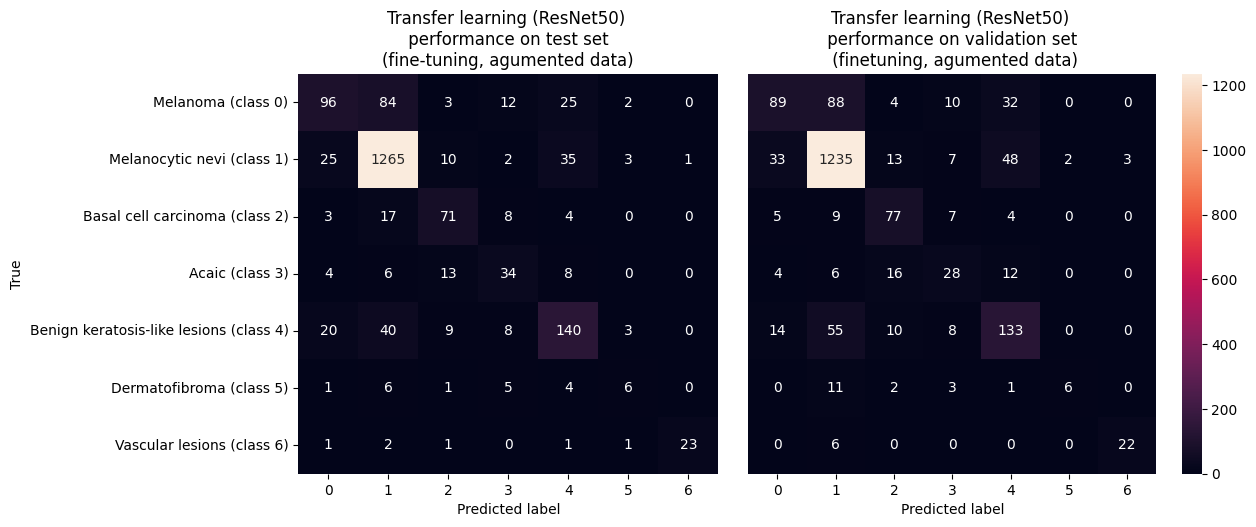

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix - test set
confusion_test = confusion_matrix(test_true_classes, test_predicted_classes)
class_labels_nums = [class_index_mapping[i] for i in range(len(class_index_mapping))]

# Confusion matrix - validation set
confusion_valid = confusion_matrix(valid_true_classes, validation_predicted_classes)

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Define the position and size of each subplot [left, bottom, width, height]
ax1 = fig.add_axes([0.15, 0.1, 0.35, 0.8])  # Left plot
ax2 = fig.add_axes([0.525, 0.1, 0.425, 0.8])  # Right plot

# Plotting the test set confusion matrix
sns.heatmap(confusion_test, annot=True, fmt="d", yticklabels=class_labels_nums, cbar=False, ax=ax1)
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True')
ax1.set_title('Transfer learning (ResNet50) \n performance on test set \n(fine-tuning, agumented data)')

# Plotting the validation set confusion matrix
sns.heatmap(confusion_valid, annot=True, fmt="d", yticklabels=False, ax=ax2)
ax2.set_xlabel('Predicted label')
ax2.set_title('Transfer learning (ResNet50) \n performance on validation set \n (finetuning, agumented data)')

plt.show()


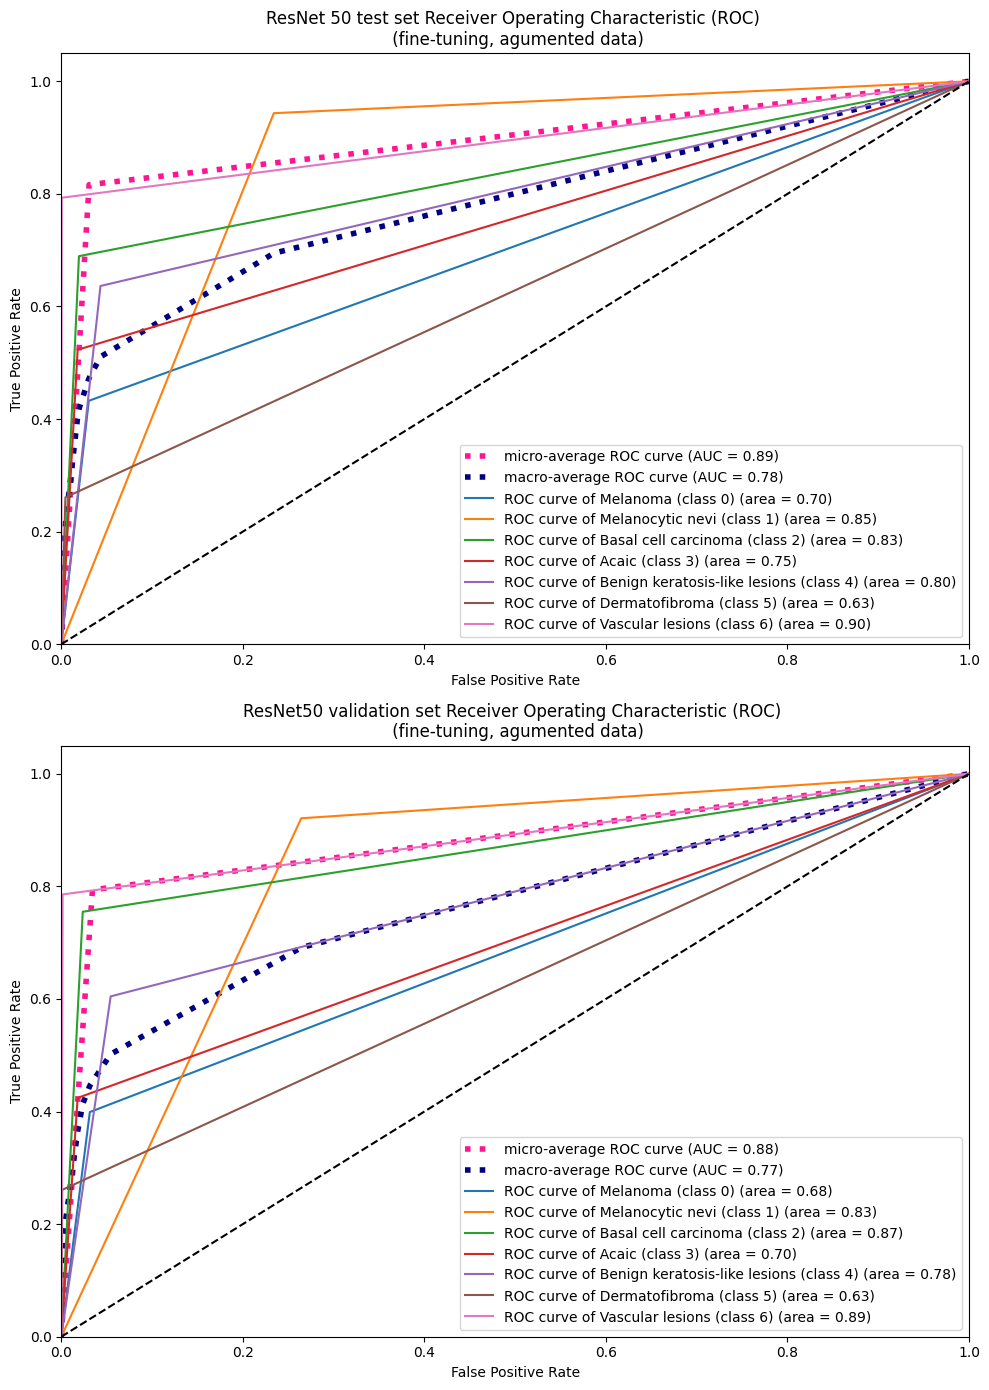

In [ ]:
num_classes = 7
# ROC and AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
test_one_hot_predictions = label_binarize(test_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])
valid_one_hot_predictions = label_binarize(validation_predictions.argmax(axis=1), classes=[0, 1, 2,3,4,5,6])

fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_val = dict()
tpr_val = dict()
roc_auc_val = dict()

# TEST SET VALUES #
# test set values
for i in range(num_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test[:,i], test_one_hot_predictions[:,i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# test set auc Macro
fpr_grid = np.linspace(0.0,1,1000)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr += np.interp(fpr_grid, fpr_test[i], tpr_test[i])

mean_tpr /= num_classes
fpr_test['macro'] = fpr_grid
tpr_test['macro'] = mean_tpr
roc_auc_test['macro'] = auc(fpr_test['macro'], tpr_test['macro'])

# test set auc micro
fpr_test['micro'], tpr_test['micro'], _ = roc_curve(y_test.ravel(),test_one_hot_predictions.ravel())
roc_auc_test['micro'] = auc(fpr_test['micro'], tpr_test['micro'])

#------------------------------------------------------------#
# VALIDATION SET VALUES
# validation set auc Macro


# validation set values
for i in range(num_classes):
    fpr_val[i], tpr_val[i], _ = roc_curve(y_val[:,i], valid_one_hot_predictions[:,i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

fpr_grid = np.linspace(0.0,1,1000)
mean_tpr_val = np.zeros_like(fpr_grid)
for i in range(num_classes):
  mean_tpr_val += np.interp(fpr_grid, fpr_val[i], tpr_val[i])

mean_tpr_val /= num_classes
fpr_val['macro'] = fpr_grid
tpr_val['macro'] = mean_tpr_val
roc_auc_val['macro'] = auc(fpr_val['macro'], tpr_val['macro'])

# validation set auc micro
fpr_val['micro'], tpr_val['micro'], _ = roc_curve(y_val.ravel(),valid_one_hot_predictions.ravel())
roc_auc_val['micro'] = auc(fpr_val['micro'], tpr_val['micro'])

#---------------------------------------------#
# PLOTTING #
# Adjust the figure size for vertical layout
plt.figure(figsize=(10, 14))

# Test Set Plot
plt.subplot(2, 1, 1)  # Change to 2 rows, 1 column, 1st plot
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_test['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_test["macro"],
    tpr_test["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_test['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_test[i], tpr_test[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet 50 test set Receiver Operating Characteristic (ROC) \n (fine-tuning, agumented data)')
plt.legend(loc="lower right")

# Validation Set Plot
plt.subplot(2, 1, 2)  # Change to 2 rows, 1 column, 2nd plot
plt.plot(
    fpr_val["micro"],
    tpr_val["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc_val['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr_val["macro"],
    tpr_val["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc_val['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
for i in range(num_classes):
    plt.plot(fpr_val[i], tpr_val[i], label=f'ROC curve of {class_index_mapping[i]} (area = {roc_auc_val[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ResNet50 validation set Receiver Operating Characteristic (ROC) \n (fine-tuning, agumented data)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.simplefilter('ignore', UndefinedMetricWarning)
print(classification_report(test_true_classes, test_predicted_classes))

              precision    recall  f1-score   support

           0       0.64      0.43      0.52       222
           1       0.89      0.94      0.92      1341
           2       0.66      0.69      0.67       103
           3       0.49      0.52      0.51        65
           4       0.65      0.64      0.64       220
           5       0.40      0.26      0.32        23
           6       0.96      0.79      0.87        29

    accuracy                           0.82      2003
   macro avg       0.67      0.61      0.63      2003
weighted avg       0.81      0.82      0.81      2003

